In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import skimage

Using cv2.HoughLines

In [7]:
I = cv2.imread("inputs/bar.png")
can=cv2.Canny(I, 50, 200 , None , 3)
lines = cv2.HoughLines(can , 1, np.pi / 180 , 100)

pl=lines.reshape(84,2)

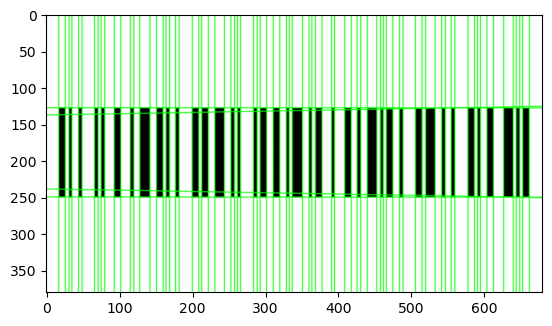

In [8]:
Iout = I.copy()
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a, b = math.cos(theta), math.sin(theta)
        x0, y0 = a * rho, b * rho
        pt1 = np.int32((x0 - 1000 * b, y0 + 1000 * a))
        pt2 = np.int32((x0 + 1000 * b, y0 - 1000 * a))
        cv2.line(Iout, pt1, pt2, (0, 255, 0), 1, cv2.LINE_AA)
fig=plt.imshow(Iout)

number of lines found 80
Minimum length 119.0
Maximum length 122.0


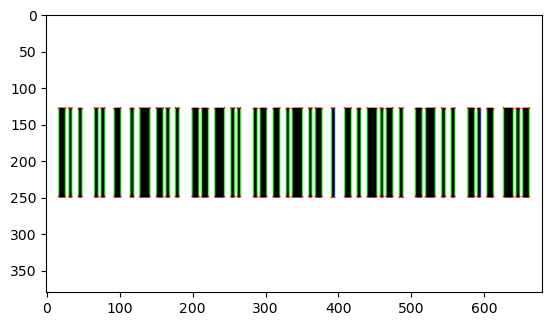

In [10]:
linesP = np.squeeze(cv2.HoughLinesP(can, 1, np.pi/180, 50, None, 50, 4))
width=(linesP[:,0]-linesP[:,2])**2+(linesP[:,1]-linesP[:,3])**2
mn=np.argmin(width)
mx=np.argmax(width)
min_line_width=np.sqrt(width[mn])
max_line_width=np.sqrt(width[mx])
number_of_lines=linesP.shape[0]
print("number of lines found", number_of_lines)
print("Minimum length",min_line_width)
print("Maximum length", max_line_width)

IoutP = I.copy()
clr=(0, 255, 0)
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i]
        if i==mn or i==mx:
            clr=(0,0,255)
        else:
            clr=(0, 255, 0)
        cv2.line(IoutP, (l[0], l[1]), (l[2], l[3]), clr, 1, cv2.LINE_AA)
        cv2.circle(IoutP, (l[0], l[1]),1,(255,0,0),-1)
        cv2.circle(IoutP, (l[2], l[3]),1,(255,0,0),-1)
    plt.imshow(IoutP)

Using skimage.transform,hough_line

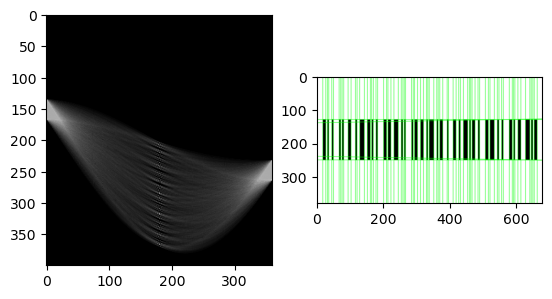

In [12]:
angles = np.linspace(-np.pi/2, np.pi/2, 360, endpoint=False)
Ih, theta, rho = skimage.transform.hough_line(can, theta=angles)

plt.subplot(1,2,1)
plt.imshow(cv2.resize(Ih.astype(np.float32)/np.max(Ih), (Ih.shape[1], 400)), cmap='gray')

plt.subplot(1,2,2)
plt.imshow(Iout)
plt.show()